<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/BREASTCANCER_RF_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BREAST CANCER CLASSIFICATION

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET

In [166]:
df=pd.read_csv("/content/bc.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA

In [167]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# CHECKING INFORMATION OF DATASET

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [169]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

# LABEL ENCODER

In [170]:
from sklearn.preprocessing import LabelEncoder 
LE=LabelEncoder()

In [171]:
df.diagnosis = LE.fit_transform(df.diagnosis)

**pandas-profiling** which is extensively used for quick overall analysis report of any dataset you load & that helps to estimate your approach towards your building up the model.

import pandas_profiling as pp
profile=pp.ProfileReport(df)
profile.to_file("output.html")

pip show pandas_profiling

!pip install pandas_profiling --upgrade

# skewness check

In [172]:
df.skew(axis = 0, skipna = True)

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed

Here some of the target variables are highly skewed,so it is better to normalize our response varibles

# CORRELATION CHECK

In [173]:
x_corr = df.corr()
x_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# CORRELOGRAM

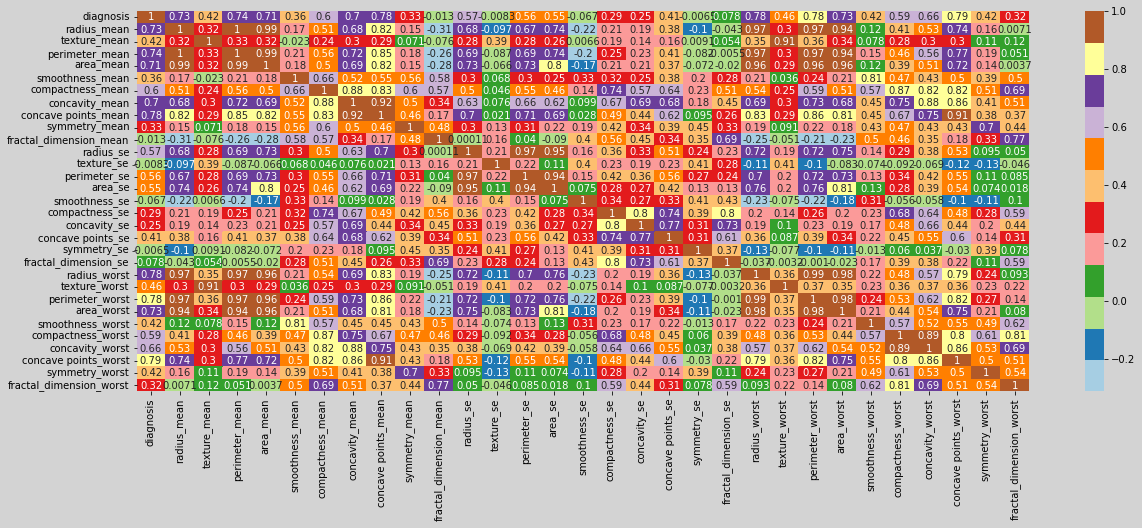

In [174]:
plt.figure(figsize=(20, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='Paired');
plt.show()

<Figure size 2160x504 with 0 Axes>

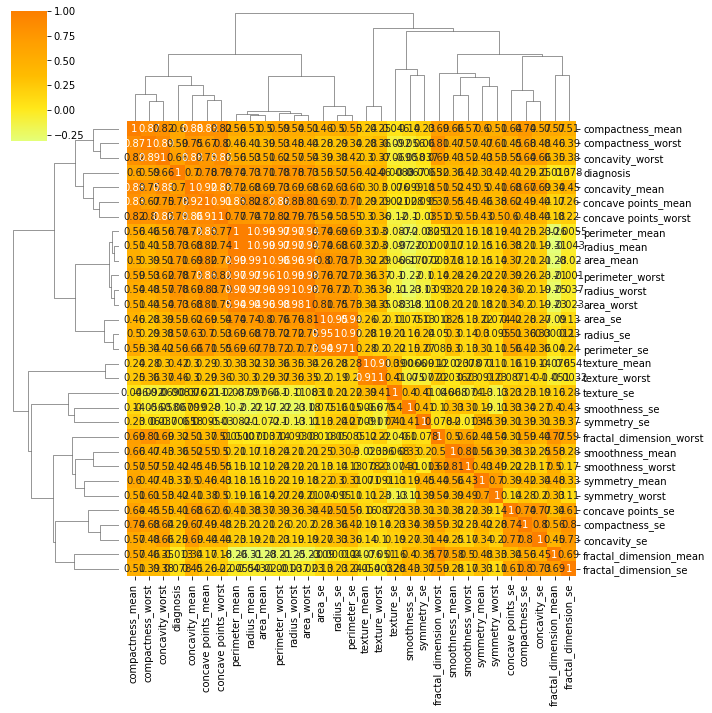

In [175]:
plt.figure(figsize=(30, 7),facecolor="lightgrey",frameon=True,edgecolor='blue')
sns.clustermap(x_corr, annot=True, cmap='Wistia');
plt.show()

# VISUALIZATION USING CUFFLINKS

In [250]:
import cufflinks as cf
print("List of Cufflinks Themes : ", cf.getThemes())

List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']


In [251]:
cf.set_config_file(theme='space',sharing='public',offline=True)

In [252]:
df.iplot()

In [253]:
df.iplot(kind="box")

# creating target and response variable for model building

In [176]:
x_ind=df.drop('diagnosis',axis=1)
y_dep=df.diagnosis

# STANDARDIZATION OF RESPONSE VARIABLE

In [177]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_ind=sc.fit_transform(x_ind)

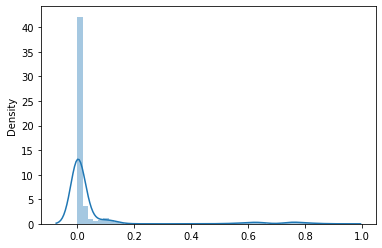

In [178]:
sns.distplot(x_norm);

# model data selection for train and validation phase

In [179]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_ind,y_dep, test_size = 0.2,random_state=2)

The random forest classifier doesn’t face the overfitting issue because it takes the average of all predictions, canceling out the biases and thus, fixing the overfitting problem.

Random forests don’t let missing values cause an issue. They can use median values to replace the continuous variables or calculate the proximity-weighted average of the missing values to solve this problem.

This algorithm offers you relative feature importance that allows you to select the most contributing features for your classifier easily. 

# RANDOM_FOREST_CLASSIFIER

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
model_rf=RandomForestClassifier(random_state=2)

In [182]:
model_rf=model_rf.fit(x_train,y_train)

In [183]:
y_pred1=model_rf.predict(x_test)
y_pred1

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1])

# CONFUSION MATRIX AND ACCURACY

In [184]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [185]:
cnf=confusion_matrix(y_test,y_pred1)

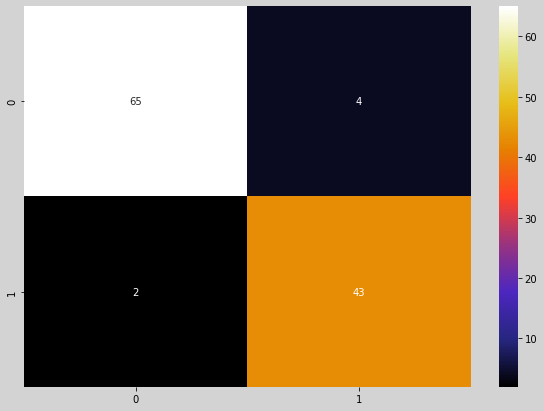

In [186]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='CMRmap');
plt.show()

In [187]:
accuracy_score(y_test,y_pred1) * 100

94.73684210526315

# Classification Repor

In [188]:
from sklearn.metrics import classification_report

In [189]:
Rep=classification_report(y_test,y_pred1)
print(Rep)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.91      0.96      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



THE PREDICTED RANDOM FOREST CLASSIFICATION MODEL  HAS ACCURACY OF 95%

When we get for HEALTHCARE PROBLEM where accuracy play major role than precision even more than 90% accuracy for our prediction is not enough should improve our predict,where ANN comes into picture

# Artificial Neural Network

In [229]:
import tensorflow as tf

In [230]:
import keras

In [231]:
from keras.models import Sequential

In [232]:
from keras.layers import Dense,Dropout

In [233]:
model=Sequential()

In [234]:
#first hidden layer
model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=30))
#second hidden layer
model.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [196]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 51        
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [236]:
model1 = model.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8275 - accuracy: 0.4857
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4042 - accuracy: 0.8418
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.2327 - accuracy: 0.9319
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1613 - accuracy: 0.9516
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1277 - accuracy: 0.9582
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9692
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0915 - accuracy: 0.9736
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9758
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9824
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.9846
Epoch 11/100
5/5 [===========

In [237]:
y_pred=model.predict(x_test)

In [242]:
y_pred=(y_pred>0.5)

# CONFUSION MATRIX AND ACCURACY

In [243]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [244]:
cnf=confusion_matrix(y_test,y_pred)

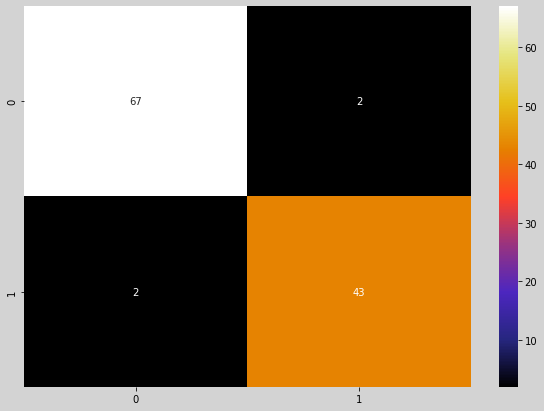

In [240]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='CMRmap');
plt.show()

In [245]:
accuracy_score(y_test,y_pred) * 100

96.49122807017544

In [224]:
print(model1.history.keys())

dict_keys(['loss', 'accuracy'])


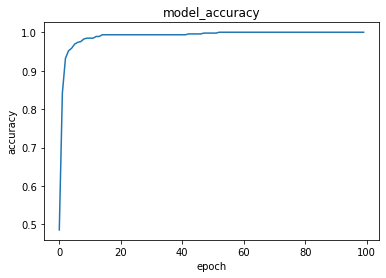

In [246]:
plt.plot(model1.history['accuracy'])
plt.title("model_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

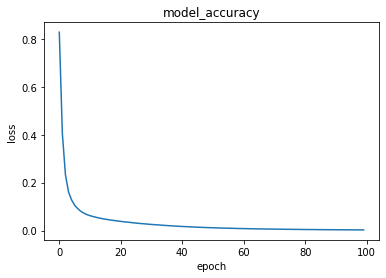

In [247]:
plt.plot(model1.history['loss'])
plt.title("model_accuracy")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Classification Repor

In [248]:
from sklearn.metrics import classification_report

In [249]:
Rep=classification_report(y_test,y_pred)
print(Rep)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



THE PREDICTED ARTIFICIAL NEURAL NETWORL CLASSIFICATION MODEL  HAS ACCURACY OF 96%